In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
plt.style.use('fivethirtyeight')
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

In [3]:
df = pd.read_csv(r"D:\Stock.csv")

In [4]:
df.head()

,Company,Date,Close/Last,Volume,Open,High,Low
0,AAPL,07/17/2023,$193.99,50520160,$191.90,$194.32,$191.81
1,AAPL,07/14/2023,$190.69,41616240,$190.23,$191.1799,$189.63
2,AAPL,07/13/2023,$190.54,41342340,$190.50,$191.19,$189.78
3,AAPL,07-12-2023,$189.77,60750250,$189.68,$191.70,$188.47
4,AAPL,07-11-2023,$188.08,46638120,$189.16,$189.30,$186.60


In [5]:
df.shape

(25160, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25160 entries, 0 to 25159
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Company     25160 non-null  object
 1   Date        25160 non-null  object
 2   Close/Last  25160 non-null  object
 3   Volume      25160 non-null  int64 
 4   Open        25160 non-null  object
 5   High        25160 non-null  object
 6   Low         25160 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.3+ MB


In [7]:
df[['Close/Last', 'Volume', 'Open', 'High', 'Low']]=df[['Close/Last', 'Volume', 'Open', 'High', 'Low']].replace(r'\W', '', regex=True)

In [8]:
df.head()

,Company,Date,Close/Last,Volume,Open,High,Low
0,AAPL,07/17/2023,19399,50520160,19190,19432,19181
1,AAPL,07/14/2023,19069,41616240,19023,1911799,18963
2,AAPL,07/13/2023,19054,41342340,19050,19119,18978
3,AAPL,07-12-2023,18977,60750250,18968,19170,18847
4,AAPL,07-11-2023,18808,46638120,18916,18930,18660


In [9]:
df.isnull().sum()

Company       0
Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [10]:
df.describe()

,Volume
count,2.516000e+04
mean,5.131764e+07
std,6.399143e+07
min,1.143952e+06
25%,1.200394e+07
50%,2.672083e+07
75%,6.857269e+07
max,1.065209e+09


In [11]:
df.dtypes

Company       object
Date          object
Close/Last    object
Volume         int64
Open          object
High          object
Low           object
dtype: object

In [12]:
df['Date'] = pd.to_datetime(df['Date'])

In [13]:
df[['Close/Last', 'Volume', 'Open', 'High', 'Low']]=df[['Close/Last', 'Volume', 'Open', 'High', 'Low']].astype(int)

In [14]:
df.dtypes

Company               object
Date          datetime64[ns]
Close/Last             int32
Volume                 int32
Open                   int32
High                   int32
Low                    int32
dtype: object

In [15]:
df['Company'].unique()

array(['AAPL', 'SBUX', 'MSFT', 'CSCO', 'QCOM', 'META', 'AMZN', 'TSLA',
       'AMD', 'NFLX'], dtype=object)

In [16]:
df.head()

,Company,Date,Close/Last,Volume,Open,High,Low
0,AAPL,2023-07-17,19399,50520160,19190,19432,19181
1,AAPL,2023-07-14,19069,41616240,19023,1911799,18963
2,AAPL,2023-07-13,19054,41342340,19050,19119,18978
3,AAPL,2023-07-12,18977,60750250,18968,19170,18847
4,AAPL,2023-07-11,18808,46638120,18916,18930,18660


In [17]:
df.groupby(by = 'Company')['Open'].max().sort_values(ascending = False)

Company
NFLX    6321791
TSLA    4093333
META    3492348
MSFT    2840464
AMZN    1858689
QCOM    1764447
AAPL    1286975
SBUX    1153959
CSCO     558876
AMD      530335
Name: Open, dtype: int32

In [18]:
df.groupby(by = 'Company')['Open'].min().sort_values(ascending = False)

Company
QCOM    4251
NFLX    3522
SBUX    3347
MSFT    3110
META    2582
CSCO    2035
AAPL    1607
AMZN    1422
TSLA     790
AMD      162
Name: Open, dtype: int32

In [19]:
df['Returns'] = df['Close/Last'].pct_change()

In [20]:
df.head()

,Company,Date,Close/Last,Volume,Open,High,Low,Returns
0,AAPL,2023-07-17,19399,50520160,19190,19432,19181,NaN
1,AAPL,2023-07-14,19069,41616240,19023,1911799,18963,-0.017011
2,AAPL,2023-07-13,19054,41342340,19050,19119,18978,-0.000787
3,AAPL,2023-07-12,18977,60750250,18968,19170,18847,-0.004041
4,AAPL,2023-07-11,18808,46638120,18916,18930,18660,-0.008906


In [21]:
df = df.drop(0)

In [22]:
df.head()

,Company,Date,Close/Last,Volume,Open,High,Low,Returns
1,AAPL,2023-07-14,19069,41616240,19023,1911799,18963,-0.017011
2,AAPL,2023-07-13,19054,41342340,19050,19119,18978,-0.000787
3,AAPL,2023-07-12,18977,60750250,18968,19170,18847,-0.004041
4,AAPL,2023-07-11,18808,46638120,18916,18930,18660,-0.008906
5,AAPL,2023-07-10,18861,59922160,18926,18999,187035,0.002818


In [23]:
aapl = df[df['Company'] == 'AAPL']

In [24]:
aapl.head()

,Company,Date,Close/Last,Volume,Open,High,Low,Returns
1,AAPL,2023-07-14,19069,41616240,19023,1911799,18963,-0.017011
2,AAPL,2023-07-13,19054,41342340,19050,19119,18978,-0.000787
3,AAPL,2023-07-12,18977,60750250,18968,19170,18847,-0.004041
4,AAPL,2023-07-11,18808,46638120,18916,18930,18660,-0.008906
5,AAPL,2023-07-10,18861,59922160,18926,18999,187035,0.002818


In [25]:
aapl.set_index('Date', inplace = True)

In [26]:
aapl.head()

,Company,Close/Last,Volume,Open,High,Low,Returns
Date,,,,,,,
2023-07-14,AAPL,19069,41616240,19023,1911799,18963,-0.017011
2023-07-13,AAPL,19054,41342340,19050,19119,18978,-0.000787
2023-07-12,AAPL,18977,60750250,18968,19170,18847,-0.004041
2023-07-11,AAPL,18808,46638120,18916,18930,18660,-0.008906
2023-07-10,AAPL,18861,59922160,18926,18999,187035,0.002818


<AxesSubplot:xlabel='Returns'>

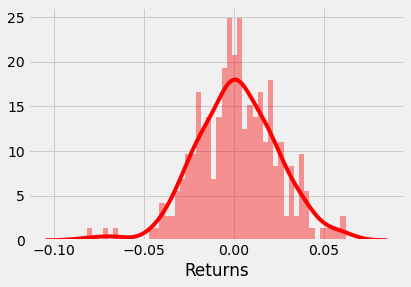

In [27]:
sns.distplot(aapl.loc['2022-01-03' : '2022-12-30']['Returns'], color = 'red', bins = 50)

In [28]:
aapl['Year'] = aapl['Date'].apply(lambda x : x.year)

KeyError: 'Date'

In [ ]:
aapl.loc['2022-01-03' : '2022-12-30']['Returns'].plot(kind = 'line', stacked = False, lw = 2, figsize=(10,6))

plt.title("2022 Returns for Apple")

In [ ]:
aapl.groupby(by = 'Year')['Open'].max().plot(kind = 'line', color='coral', figsize=(10,6), ls='--')

plt.title("Highest Opening Price of Apple per Year")

In [29]:
df.head()

,Company,Date,Close/Last,Volume,Open,High,Low,Returns
1,AAPL,2023-07-14,19069,41616240,19023,1911799,18963,-0.017011
2,AAPL,2023-07-13,19054,41342340,19050,19119,18978,-0.000787
3,AAPL,2023-07-12,18977,60750250,18968,19170,18847,-0.004041
4,AAPL,2023-07-11,18808,46638120,18916,18930,18660,-0.008906
5,AAPL,2023-07-10,18861,59922160,18926,18999,187035,0.002818


In [30]:
df['Year'] = df['Date'].apply(lambda x : x.year)

In [31]:
df.set_index('Date', inplace = True)

In [32]:
df.head()

,Company,Close/Last,Volume,Open,High,Low,Returns,Year
Date,,,,,,,,
2023-07-14,AAPL,19069,41616240,19023,1911799,18963,-0.017011,2023
2023-07-13,AAPL,19054,41342340,19050,19119,18978,-0.000787,2023
2023-07-12,AAPL,18977,60750250,18968,19170,18847,-0.004041,2023
2023-07-11,AAPL,18808,46638120,18916,18930,18660,-0.008906,2023
2023-07-10,AAPL,18861,59922160,18926,18999,187035,0.002818,2023


<AxesSubplot:xlabel='Company'>

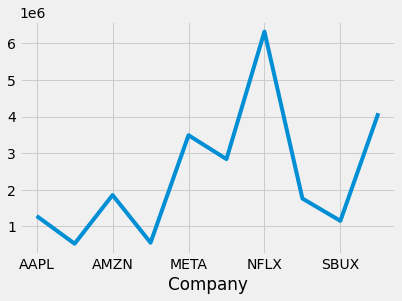

In [33]:
df.groupby(by = 'Company')['Open'].max().plot()

In [34]:
tickers = list(map(str, ['AAPL', 'SBUX', 'MSFT']))

In [35]:
tickers

['AAPL', 'SBUX', 'MSFT']

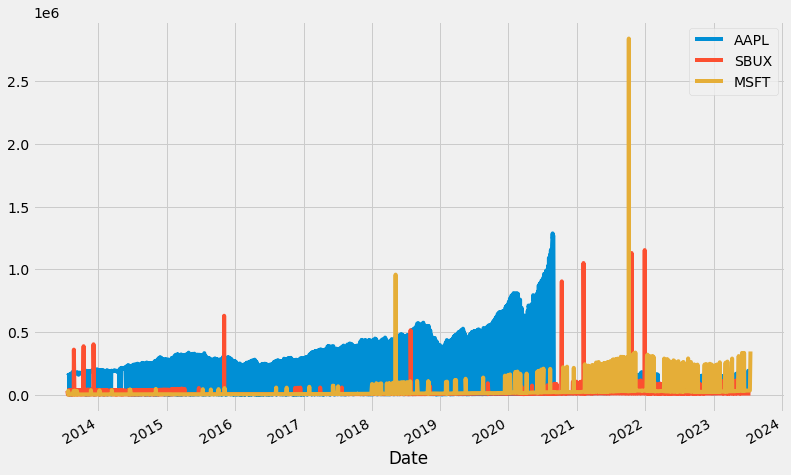

In [36]:
for tick in tickers:
    df[df['Company']==tick]['Open'].plot(figsize=(12,8), label = tick)
    
plt.legend()

In [37]:
df[(df['Company'] == 'AAPL') & (df['Year'] == 2022)]['Open'].max()

174745

In [38]:
import plotly
import cufflinks as cf
cf.go_offline()

In [39]:
max_open = pd.DataFrame(df.groupby(by= ['Company', 'Year'])['Open'].max())

In [40]:
max_open.reset_index(inplace=True)

In [41]:
max_open[max_open['Year'] == 2022].iplot(x='Company', y='Open', title = "Highest Opening Price for Companies in 2022")

In [42]:
df.head()

,Company,Close/Last,Volume,Open,High,Low,Returns,Year
Date,,,,,,,,
2023-07-14,AAPL,19069,41616240,19023,1911799,18963,-0.017011,2023
2023-07-13,AAPL,19054,41342340,19050,19119,18978,-0.000787,2023
2023-07-12,AAPL,18977,60750250,18968,19170,18847,-0.004041,2023
2023-07-11,AAPL,18808,46638120,18916,18930,18660,-0.008906,2023
2023-07-10,AAPL,18861,59922160,18926,18999,187035,0.002818,2023


In [43]:
aapl_neg = aapl[aapl['Returns']<0]

C:\Users\ayush\AppData\Local\Temp\ipykernel_23724\1303041892.py:1: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



Text(0.5, 1.0, "Apple's Lowest Returns")

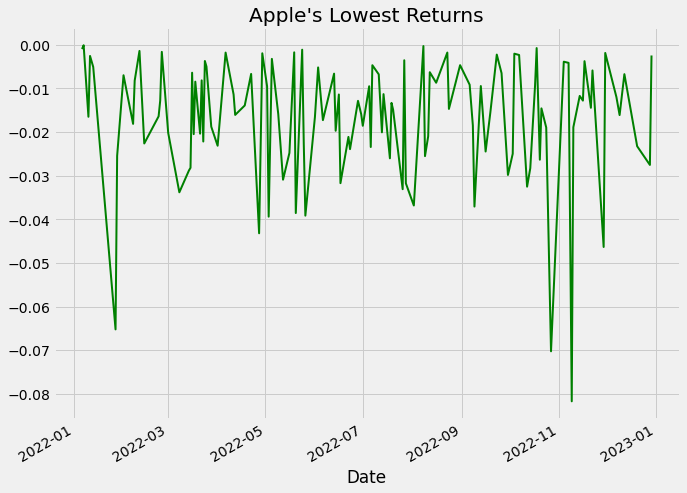

In [44]:
aapl_neg.loc['2022-01-03' : '2022-12-30']['Returns'].plot(kind = 'line', figsize=(10,8), lw = 2, color = 'green')

plt.title("Apple's Lowest Returns")

In [45]:
aapl_pos = aapl[aapl['Returns']>0]

In [46]:
#aapl_pos

Text(0.5, 1.0, "Apple's Highest Returns")

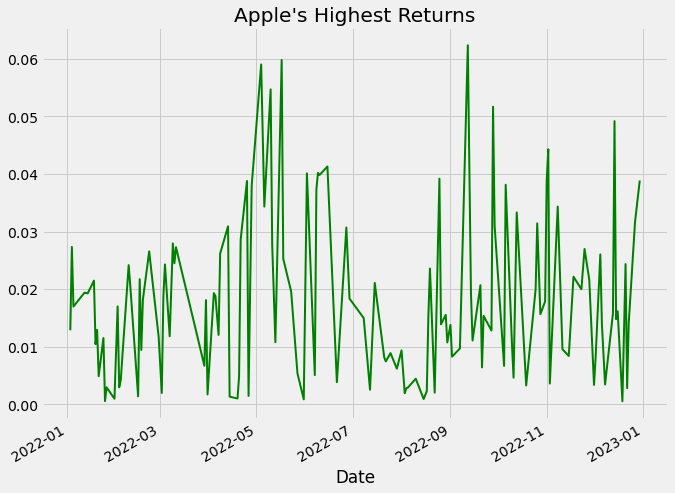

In [47]:
aapl_pos.loc['2022-01-03' : '2022-12-30']['Returns'].plot(kind = 'line', figsize=(10,8), lw = 2, color = 'green')

plt.title("Apple's Highest Returns")

In [48]:
df.head()

,Company,Close/Last,Volume,Open,High,Low,Returns,Year
Date,,,,,,,,
2023-07-14,AAPL,19069,41616240,19023,1911799,18963,-0.017011,2023
2023-07-13,AAPL,19054,41342340,19050,19119,18978,-0.000787,2023
2023-07-12,AAPL,18977,60750250,18968,19170,18847,-0.004041,2023
2023-07-11,AAPL,18808,46638120,18916,18930,18660,-0.008906,2023
2023-07-10,AAPL,18861,59922160,18926,18999,187035,0.002818,2023


In [49]:
df['Company'].unique()

array(['AAPL', 'SBUX', 'MSFT', 'CSCO', 'QCOM', 'META', 'AMZN', 'TSLA',
       'AMD', 'NFLX'], dtype=object)

In [50]:
netflix = df[df['Company'] == 'NFLX']

In [68]:
netflix.head()

,Company,Close/Last,Volume,Open,High,Low,Returns,Year
Date,,,,,,,,
2023-07-17,NFLX,45005,6901141,44557,45668,4451053,95.993534,2023
2023-07-14,NFLX,44191,7195860,452785,45648,43970,-0.018087,2023
2023-07-13,NFLX,45038,6157475,44700,45167,441177,0.019167,2023
2023-07-12,NFLX,44405,5731657,44455,4454085,4377494,-0.014055,2023
2023-07-11,NFLX,44021,4574559,43865,44080,4310415,-0.008648,2023


In [52]:
netflix['Low'].idxmin()

Timestamp('2013-08-20 00:00:00')

In [53]:
netflix['High'].idxmax()

Timestamp('2021-11-17 00:00:00')

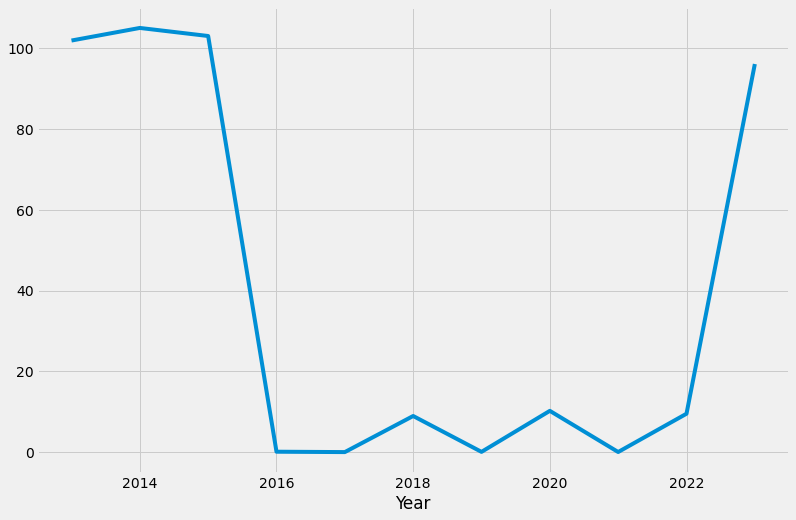

In [54]:
ax = netflix.groupby(by='Year')['Returns'].max().plot(kind='line', figsize=(12,8))



In [55]:
microsoft = df[df['Company'] == 'MSFT']

In [56]:
microsoft.head()

,Company,Close/Last,Volume,Open,High,Low,Returns,Year
Date,,,,,,,,
2023-07-17,MSFT,34573,20363930,345678,34699,34220,9.097255,2023
2023-07-14,MSFT,34524,28352730,34759,35143,34431,-0.001417,2023
2023-07-13,MSFT,34266,20567160,33956,34374,33902,-0.007473,2023
2023-07-12,MSFT,33720,29995260,33660,341652,33567,-0.015934,2023
2023-07-11,MSFT,33247,26698220,33106,33286,32700,-0.014027,2023


<AxesSubplot:xlabel='Year'>

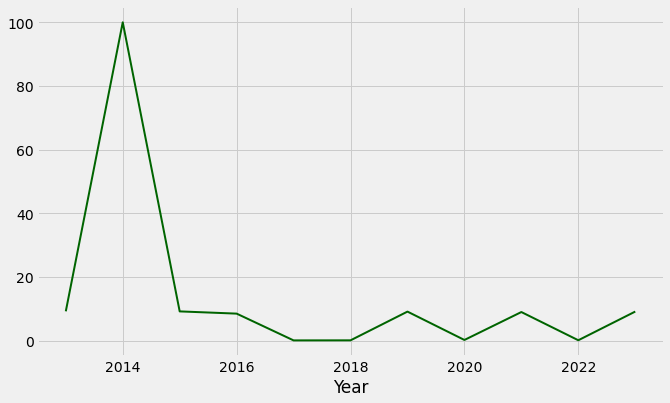

In [57]:
microsoft.groupby(by='Year')['Returns'].max().plot(kind='line', figsize=(10,6), lw=2, color='darkgreen')

In [58]:
returns = pd.DataFrame(df.groupby(by=['Company', 'Year'])['Returns'].max())

In [59]:
returns.reset_index(inplace=True)

In [60]:
returns['Company'].unique()

array(['AAPL', 'AMD', 'AMZN', 'CSCO', 'META', 'MSFT', 'NFLX', 'QCOM',
       'SBUX', 'TSLA'], dtype=object)

<AxesSubplot:xlabel='Year', ylabel='Returns'>

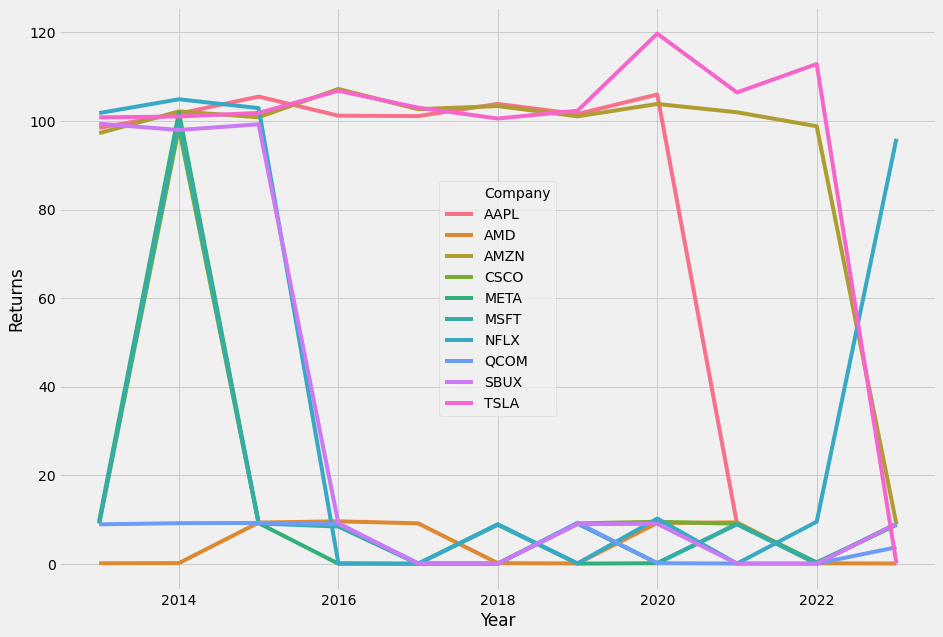

In [61]:
plt.figure(figsize=(14,10))

sns.lineplot(x='Year', y='Returns', data = returns, hue ='Company')

In [62]:
df.head()

,Company,Close/Last,Volume,Open,High,Low,Returns,Year
Date,,,,,,,,
2023-07-14,AAPL,19069,41616240,19023,1911799,18963,-0.017011,2023
2023-07-13,AAPL,19054,41342340,19050,19119,18978,-0.000787,2023
2023-07-12,AAPL,18977,60750250,18968,19170,18847,-0.004041,2023
2023-07-11,AAPL,18808,46638120,18916,18930,18660,-0.008906,2023
2023-07-10,AAPL,18861,59922160,18926,18999,187035,0.002818,2023


In [65]:
df[df['Company'] == 'AAPL']['Returns'].idxmax()

Timestamp('2020-02-26 00:00:00')

In [67]:
aapl

,Company,Close/Last,Volume,Open,High,Low,Returns
Date,,,,,,,
2023-07-14,AAPL,19069,41616240,19023,1911799,18963,-0.017011
2023-07-13,AAPL,19054,41342340,19050,19119,18978,-0.000787
2023-07-12,AAPL,18977,60750250,18968,19170,18847,-0.004041
2023-07-11,AAPL,18808,46638120,18916,18930,18660,-0.008906
2023-07-10,AAPL,18861,59922160,18926,18999,187035,0.002818
...,...,...,...,...,...,...,...
2013-07-24,AAPL,157325,591624923,156761,158782,15545,0.004585
2013-07-23,AAPL,149639,354477618,152143,152486,149539,-0.048854
2013-07-22,AAPL,152254,207648981,153379,153482,151953,0.017475


In [278]:
df.groupby(by='Company')['Returns'].max()

Company
AAPL    105.994004
AMD       9.630841
AMZN    107.236797
CSCO     98.394748
META    101.978207
MSFT     99.969648
NFLX    104.911546
QCOM      9.308866
SBUX     99.395613
TSLA    119.737852
Name: Returns, dtype: float64

In [73]:
max_return = pd.DataFrame(df.groupby(by=['Company', 'Year'])['Returns'].max())

In [75]:
max_return.reset_index(inplace=True)

In [76]:
max_return

,Company,Year,Returns
0,AAPL,2013,98.470522
1,AAPL,2014,101.667364
2,AAPL,2015,105.514750
3,AAPL,2016,101.205061
4,AAPL,2017,101.118244
...,...,...,...
105,TSLA,2019,102.318153
106,TSLA,2020,119.737852
107,TSLA,2021,106.448374
108,TSLA,2022,112.874615


In [79]:
df.head()

,Company,Close/Last,Volume,Open,High,Low,Returns,Year
Date,,,,,,,,
2023-07-14,AAPL,19069,41616240,19023,1911799,18963,-0.017011,2023
2023-07-13,AAPL,19054,41342340,19050,19119,18978,-0.000787,2023
2023-07-12,AAPL,18977,60750250,18968,19170,18847,-0.004041,2023
2023-07-11,AAPL,18808,46638120,18916,18930,18660,-0.008906,2023
2023-07-10,AAPL,18861,59922160,18926,18999,187035,0.002818,2023


In [81]:
df_new = df

In [83]:
df_new.reset_index(inplace=True)

In [84]:
df_new.head()

,Date,Company,Close/Last,Volume,Open,High,Low,Returns,Year
0,2023-07-14,AAPL,19069,41616240,19023,1911799,18963,-0.017011,2023
1,2023-07-13,AAPL,19054,41342340,19050,19119,18978,-0.000787,2023
2,2023-07-12,AAPL,18977,60750250,18968,19170,18847,-0.004041,2023
3,2023-07-11,AAPL,18808,46638120,18916,18930,18660,-0.008906,2023
4,2023-07-10,AAPL,18861,59922160,18926,18999,187035,0.002818,2023


In [89]:
df.head()

,Date,Company,Close/Last,Volume,Open,High,Low,Returns,Year
0,2023-07-14,AAPL,19069,41616240,19023,1911799,18963,-0.017011,2023
1,2023-07-13,AAPL,19054,41342340,19050,19119,18978,-0.000787,2023
2,2023-07-12,AAPL,18977,60750250,18968,19170,18847,-0.004041,2023
3,2023-07-11,AAPL,18808,46638120,18916,18930,18660,-0.008906,2023
4,2023-07-10,AAPL,18861,59922160,18926,18999,187035,0.002818,2023


In [92]:
df['Company'].unique()

array(['AAPL', 'SBUX', 'MSFT', 'CSCO', 'QCOM', 'META', 'AMZN', 'TSLA',
       'AMD', 'NFLX'], dtype=object)

In [101]:
tickers = ['AAPL', 'SBUX', 'MSFT', 'CSCO', 'QCOM', 'META', 'AMZN', 'TSLA',
       'AMD', 'NFLX']

In [98]:
df[df['Company'] == 'AMD']['Returns'].max()

9.630841121495328

In [96]:
df[df['Company'] == 'AMD']['Returns'].idxmax()

22019

In [97]:
df.at[22019, 'Year']

2016

In [162]:
for ticks in tickers:
    index_ = df[df['Company'] == ticks]['Returns'].idxmax()
    print(ticks, df.at[index_, 'Year'], df[df['Company'] == ticks]['Returns'].max())
    
    

AAPL Date
2020-02-26    2020
2020-02-26    2020
2020-02-26    2020
2020-02-26    2020
2020-02-26    2020
2020-02-26    2020
2020-02-26    2020
2020-02-26    2020
2020-02-26    2020
2020-02-26    2020
Name: Year, dtype: int64 105.99400409476455
SBUX Date
2013-11-13    2013
2013-11-13    2013
2013-11-13    2013
2013-11-13    2013
2013-11-13    2013
2013-11-13    2013
2013-11-13    2013
2013-11-13    2013
2013-11-13    2013
2013-11-13    2013
Name: Year, dtype: int64 99.39561252156766
MSFT Date
2014-07-30    2014
2014-07-30    2014
2014-07-30    2014
2014-07-30    2014
2014-07-30    2014
2014-07-30    2014
2014-07-30    2014
2014-07-30    2014
2014-07-30    2014
2014-07-30    2014
Name: Year, dtype: int64 99.96964782205747
CSCO Date
2014-04-04    2014
2014-04-04    2014
2014-04-04    2014
2014-04-04    2014
2014-04-04    2014
2014-04-04    2014
2014-04-04    2014
2014-04-04    2014
2014-04-04    2014
2014-04-04    2014
Name: Year, dtype: int64 98.39474835886215
QCOM Date
2019-05-23    201

In [133]:
#ticks, df.at[index_, 'Year'], 

In [108]:
df.head()

,Date,Company,Close/Last,Volume,Open,High,Low,Returns,Year
0,2023-07-14,AAPL,19069,41616240,19023,1911799,18963,-0.017011,2023
1,2023-07-13,AAPL,19054,41342340,19050,19119,18978,-0.000787,2023
2,2023-07-12,AAPL,18977,60750250,18968,19170,18847,-0.004041,2023
3,2023-07-11,AAPL,18808,46638120,18916,18930,18660,-0.008906,2023
4,2023-07-10,AAPL,18861,59922160,18926,18999,187035,0.002818,2023


In [109]:
df.set_index('Date', inplace=True)

In [110]:
df.head()

,Company,Close/Last,Volume,Open,High,Low,Returns,Year
Date,,,,,,,,
2023-07-14,AAPL,19069,41616240,19023,1911799,18963,-0.017011,2023
2023-07-13,AAPL,19054,41342340,19050,19119,18978,-0.000787,2023
2023-07-12,AAPL,18977,60750250,18968,19170,18847,-0.004041,2023
2023-07-11,AAPL,18808,46638120,18916,18930,18660,-0.008906,2023
2023-07-10,AAPL,18861,59922160,18926,18999,187035,0.002818,2023


In [111]:
csco = df[df['Company'] == 'CSCO']

C:\Users\ayush\AppData\Local\Temp\ipykernel_23724\702541878.py:1: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



<AxesSubplot:xlabel='Date'>

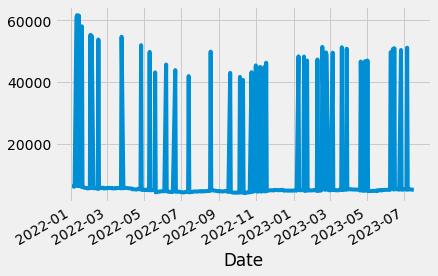

In [115]:
csco.loc['2022-01-01':'2023-12-31']['Open'].plot(kind='line')

In [122]:
meta_amzn = df[(df['Company'] == 'META') | (df['Company'] == 'AMZN')]

In [123]:
meta_amzn

,Company,Close/Last,Volume,Open,High,Low,Returns,Year
Date,,,,,,,,
2023-07-17,META,31062,25323130,30754,31171,30471,-0.491745,2023
2023-07-14,META,30887,23054110,31179,31488,3073612,-0.005634,2023
2023-07-13,META,31341,30280970,31362,31624,3102901,0.014699,2023
2023-07-12,META,30934,36677130,301745,30945,3001004,-0.012986,2023
2023-07-11,META,29829,27585920,29390,30018,29190,-0.035721,2023
...,...,...,...,...,...,...,...,...
2013-07-24,AMZN,14947,39980680,15151,15192,14902,8.852999,2013
2013-07-23,AMZN,15053,39981880,15158,15253,15028,0.007092,2013
2013-07-22,AMZN,15174,50411260,154625,154625,1510,0.008038,2013


<AxesSubplot:xlabel='Year', ylabel='Returns'>

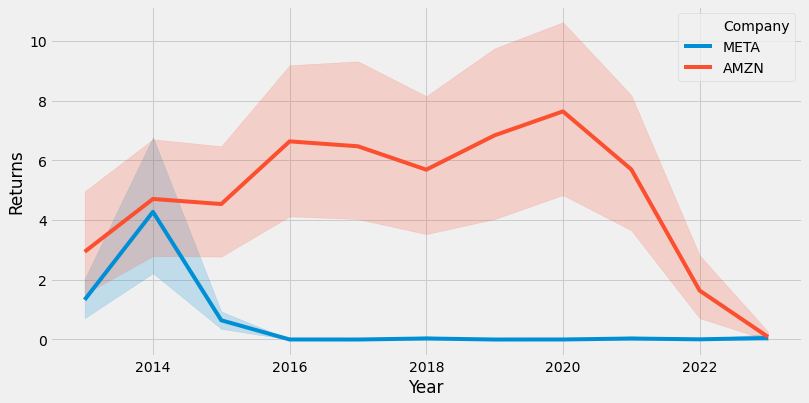

In [132]:
plt.figure(figsize=(12,6))

sns.lineplot(x = 'Year', y = 'Returns', data = meta_amzn, hue = 'Company')

In [157]:
high_return = {'Companies' : ['AAPL', 'SBUX', 'MSFT', 'CSCO', 'QCOM', 'META', 'AMZN', 'TSLA',
       'AMD', 'NFLX'], 'Year': [2020,2013,2014,2014,2019,2014,2016,2020,2016,2014], 'Returns': [105.99400409476455,
99.39561252156766,
99.96964782205747,
98.39474835886215,
9.308865730252228,
101.978207177103,
107.23679727427599,
119.73785218456513,
9.630841121495328,
104.91154639175258]}

In [158]:
high_return = pd.DataFrame(high_return)

In [159]:
high_return

,Companies,Year,Returns
0,AAPL,2020,105.994004
1,SBUX,2013,99.395613
2,MSFT,2014,99.969648
3,CSCO,2014,98.394748
4,QCOM,2019,9.308866
5,META,2014,101.978207
6,AMZN,2016,107.236797
7,TSLA,2020,119.737852
8,AMD,2016,9.630841
9,NFLX,2014,104.911546


<AxesSubplot:xlabel='Year', ylabel='Returns'>

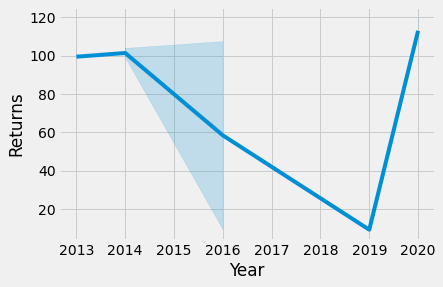

In [160]:
sns.lineplot(x='Year', y='Returns', data = high_return)